In [78]:
import cv2
import numpy as np
import pandas as pd
from scipy.signal import convolve2d
import math
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

In [79]:
def disk_kernel(radius:float)->np.array:
    size = 2*math.ceil(radius) +1
    kernel = np.zeros((size,size))
    a = size //2
    for i in range(size):
        for j in range(size):
            x = i-a
            y = j-a
            distance = np.sqrt(x**2 + y**2)
            if(distance <=radius-0.5):
                kernel[i,j] = 1
            elif(distance >= radius-0.5 and distance <= radius +0.5):
                kernel[i,j] = np.round(radius +0.5 - distance,3)
            else:
                kernel[i,j] = 0
    return kernel

def convolve(image:np.array,kernel:np.array)->np.array:
    x,y = image.shape[0]//2,image.shape[1]//2
    image_shape = image.shape
    padded_image = np.pad(image,((image_shape[0]//2,image_shape[0]//2),(image_shape[1]//2,image_shape[1]//2)),mode='reflect')

    convolved_image =convolve2d(padded_image,kernel,mode='same')
    out_image = convolved_image[x:x+image.shape[0],y:y+image.shape[1]]
    out_image =((out_image - np.min(out_image))/(np.max(out_image)-np.min(out_image)) *255).astype(np.uint8)
    return out_image.astype(np.uint8)

#########################################################################
def blur_using_fft(image:np.array,kernel:np.array,intermediate=False)->np.array:
    image_shape = image.shape
    padded_image = np.pad(image,((image_shape[0]//2,image_shape[0]//2),(image_shape[1]//2,image_shape[1]//2)),mode='reflect')
    print("image_shape:",image_shape," padded_image_shape: ",padded_image.shape)
    padded_kernel = np.zeros(padded_image.shape)
    padded_kernel[(padded_kernel.shape[0] // 2 - kernel.shape[0] // 2):(padded_kernel.shape[0] // 2 + kernel.shape[0] // 2 + 1), 
                  (padded_kernel.shape[1] // 2 - kernel.shape[1] // 2):(padded_kernel.shape[1] // 2 + kernel.shape[1] // 2 + 1)] = kernel
    padded_kernel = fftshift(padded_kernel)
    F_image = fft2(padded_image)
    F_kernel = fft2(padded_kernel)
    Image_filtered = F_image*F_kernel
    inversed = np.real(ifft2(Image_filtered))
    x,y = image_shape[0]//2,image_shape[1]//2
    out_image =inversed[x:x+image_shape[0],y:y+image_shape[1]]
    out_image =((out_image - np.min(out_image))/(np.max(out_image)-np.min(out_image)) *255).astype(np.uint8)

    if(intermediate):
        log_spectrum_shifted = np.log(np.abs(fftshift(F_image)))
        log_spectrum_shifted = (255*(log_spectrum_shifted - np.min(log_spectrum_shifted))/(np.max(log_spectrum_shifted) - np.min(log_spectrum_shifted))).astype(np.uint8)
        cv2.imwrite("output_images/Q1_b_shifted_spectrum.png",log_spectrum_shifted,[cv2.IMWRITE_PNG_COMPRESSION,0])
        log_shifted_filtered =  np.log(np.abs(fftshift(Image_filtered)))
        log_shifted_filtered = (255*(log_shifted_filtered - np.min(log_shifted_filtered))/(np.max(log_shifted_filtered) - np.min(log_shifted_filtered))).astype(np.uint8)
        cv2.imwrite("output_images/Q1_b_shifted_filtered_image.png",log_shifted_filtered,[cv2.IMWRITE_PNG_COMPRESSION,0])
        log_shifted_kernel = np.log(np.abs(fftshift(F_kernel)))
        log_shifted_kernel = 255*(log_shifted_kernel-np.min(log_shifted_kernel))/(np.max(log_shifted_kernel) - np.min(log_shifted_kernel))
        cv2.imwrite("output_images/Q1_b_shifted_kernel_image.png",log_shifted_kernel,[cv2.IMWRITE_PNG_COMPRESSION,0])

    return out_image.astype(np.uint8)


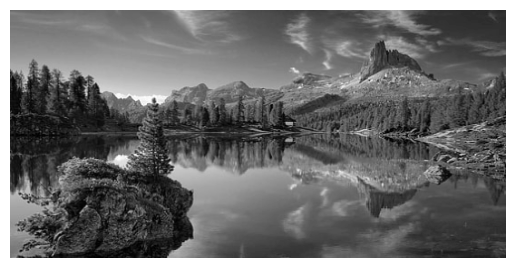

In [80]:
image1 = cv2.imread("data/img1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(image1, cmap='gray')

plt.axis('off') 
plt.show()

Q1 a image shape (250, 500)


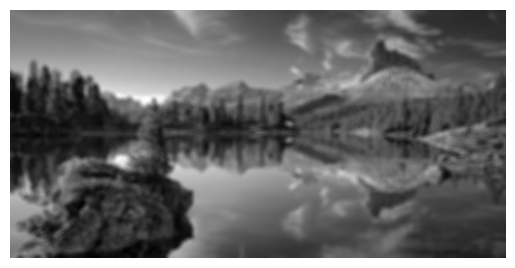

In [81]:
#******************Q1**************************
kernel1 = disk_kernel(3)
filtered_image1 = convolve(image1,kernel1)
print("Q1 a image shape",filtered_image1.shape)
plt.imshow(filtered_image1, cmap='gray')
plt.axis('off')
plt.show()

image_shape: (250, 500)  padded_image_shape:  (500, 1000)
Q1 a image shape (250, 500)


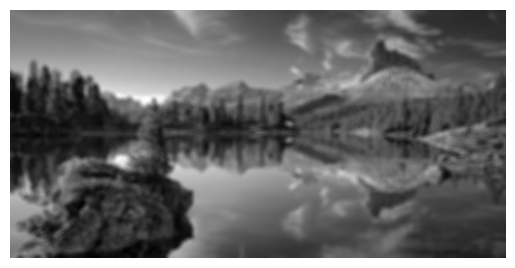

In [82]:
# image1 = cv2.imread("data/img1.png", cv2.IMREAD_GRAYSCALE)
filtered_image2 =blur_using_fft(image1,kernel1,True)
print("Q1 a image shape",filtered_image2.shape)
plt.imshow(filtered_image2, cmap='gray')
plt.axis('off')
plt.show()

In [83]:
z=(filtered_image2==filtered_image1) 
p = (z==True)
print("equal values should be ",250*500," equal values ",np.sum(np.array(z)))

equal values should be  125000  equal values  125000


In [84]:
cv2.imwrite("output_images/Q1_output1.png",filtered_image1,[cv2.IMWRITE_PNG_COMPRESSION,0])

True